Импортируемые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Чтение файла с данными

In [ ]:
df = pd.read_csv('/content/IndianWeatherRepository.csv')
df

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1696024800,2023-09-30 03:30,27.0,80.6,...,370.6,464.8,6,10,06:11 AM,06:09 PM,06:15 PM,05:48 AM,Full Moon,100
18051,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1696024800,2023-09-30 03:30,24.2,75.5,...,6.6,7.2,1,1,05:11 AM,05:10 PM,05:15 PM,04:46 AM,Full Moon,100
18052,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1696024800,2023-09-30 03:30,25.1,77.2,...,5.4,7.6,1,1,06:02 AM,06:04 PM,06:10 PM,05:44 AM,Full Moon,100
18053,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1696024800,2023-09-30 03:30,22.1,71.7,...,2.1,2.5,1,1,06:09 AM,06:13 PM,06:19 PM,05:53 AM,Full Moon,100


In [ ]:
pd.value_counts(df['condition_text'].values.ravel())

Clear                                  4413
Partly cloudy                          3429
Mist                                   2773
Patchy rain possible                   2370
Light rain shower                      1745
Sunny                                   772
Cloudy                                  657
Fog                                     483
Overcast                                371
Moderate or heavy rain shower           323
Light rain                              182
Moderate or heavy rain with thunder      83
Light drizzle                            79
Moderate rain                            78
Patchy light drizzle                     68
Patchy light rain                        48
Heavy rain                               38
Moderate rain at times                   36
Torrential rain shower                   34
Patchy light rain with thunder           29
Thundery outbreaks possible              27
Heavy rain at times                       4
Light snow showers              

Удаление столбцов, которые признаны ненужными

In [ ]:
df = df.drop(columns=['country', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_fahrenheit',
         'wind_mph', 'wind_direction', 'pressure_in', 'precip_in', 'feels_like_fahrenheit',
         'visibility_miles', 'gust_mph', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
         'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index',
         'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase'])

Удаление случайных ячеек данных

In [ ]:
from random import choice
random_rows = np.random.randint(0, df.shape[0] + 1, size = (df.shape[0]*15)//100)
for row in random_rows:
    df.loc[row, [choice(df.columns)]] = np.nan

Информация о датасете

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18055 entries, 0 to 18054
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   location_name                18055 non-null  object 
 1   region                       18055 non-null  object 
 2   latitude                     18055 non-null  float64
 3   longitude                    18055 non-null  float64
 4   temperature_celsius          18055 non-null  float64
 5   condition_text               18055 non-null  object 
 6   wind_kph                     18055 non-null  float64
 7   wind_degree                  18055 non-null  int64  
 8   pressure_mb                  18055 non-null  float64
 9   precip_mm                    18055 non-null  float64
 10  humidity                     18055 non-null  int64  
 11  cloud                        18055 non-null  int64  
 12  feels_like_celsius           18055 non-null  float64
 13  visibility_km   

Проверка на наличие пустых полей после их внедрения

In [ ]:
df.isnull().sum()

Удаление строк, где есть пустые поля

In [ ]:
df = df.dropna(axis=0)

Проверка на наличие пустых полей после их удаления

In [ ]:
df.isnull().sum()

Показ моды, медианы и др. значений данных для каждого столбца в виде таблицы


In [ ]:
#Showing moda, mediana, etc
df.describe()

Удаление части столбцов для построения гистограмм

In [ ]:
df1 =df.drop(columns = ['location_name', 'region', 'condition_text', 'latitude', 'longitude', 'precip_mm', 'uv_index', 'moon_illumination',
                        'pressure_mb', 'gust_kph', 'air_quality_Carbon_Monoxide', 'wind_degree', 'wind_kph', 'air_quality_Ozone', ])

Построение диаграмм рассеяния и гистограмм

array([[<Axes: xlabel='temperature_celsius', ylabel='temperature_celsius'>,
        <Axes: xlabel='humidity', ylabel='temperature_celsius'>,
        <Axes: xlabel='cloud', ylabel='temperature_celsius'>,
        <Axes: xlabel='feels_like_celsius', ylabel='temperature_celsius'>,
        <Axes: xlabel='visibility_km', ylabel='temperature_celsius'>],
       [<Axes: xlabel='temperature_celsius', ylabel='humidity'>,
        <Axes: xlabel='humidity', ylabel='humidity'>,
        <Axes: xlabel='cloud', ylabel='humidity'>,
        <Axes: xlabel='feels_like_celsius', ylabel='humidity'>,
        <Axes: xlabel='visibility_km', ylabel='humidity'>],
       [<Axes: xlabel='temperature_celsius', ylabel='cloud'>,
        <Axes: xlabel='humidity', ylabel='cloud'>,
        <Axes: xlabel='cloud', ylabel='cloud'>,
        <Axes: xlabel='feels_like_celsius', ylabel='cloud'>,
        <Axes: xlabel='visibility_km', ylabel='cloud'>],
       [<Axes: xlabel='temperature_celsius', ylabel='feels_like_celsius'>,
   

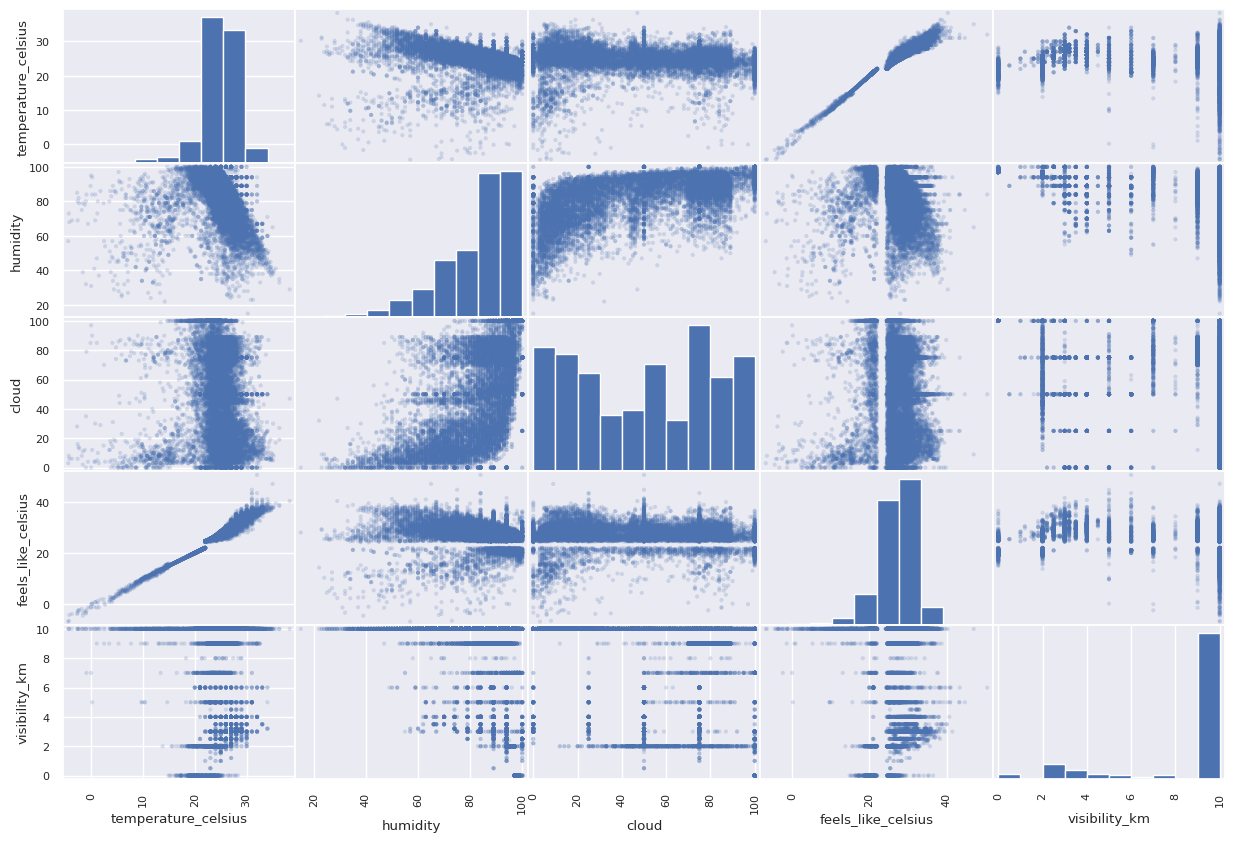

In [ ]:
pd.plotting.scatter_matrix(df1, alpha = 0.2, figsize=(15, 10), diagonal='hist')

Гистограмма, показыващая, в каком регионе наибольшее загрязнение монооксидом углерода

In [ ]:
most_polluting_state = df.groupby('region')['air_quality_Carbon_Monoxide'].mean().idxmax()
fig = px.bar(df.groupby('region')['air_quality_Carbon_Monoxide'].mean().reset_index(), x='region', y='air_quality_Carbon_Monoxide', title='Average Carbon Monoxide by State')
fig.show()
print(f"The most polluting state is {most_polluting_state}")

Ящик с усами для оценки скорости ветра в км/ч

<Axes: ylabel='wind_kph'>

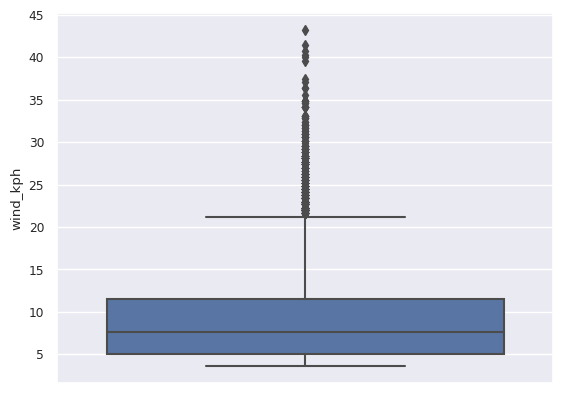

In [ ]:
sns.boxplot(y = df['wind_kph'])


Ящик с усами для оценки влажности

In [ ]:
sns.boxplot(y = df['humidity'])

Нормализация данных

In [ ]:
df_n = df.drop(columns = ['location_name', 'region', 'condition_text'])
#normalize values in every column
df_norm = (df_n-df_n.min ())/ (df_n.max () - df_n.min ())

#view normalized DataFrame
df_norm

,latitude,longitude,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,moon_illumination
0,0.622499,0.326127,0.747073,0.426768,0.779944,0.458333,0.000000,0.611765,0.26,0.636998,1.00,0.750,0.332402,0.011293,0.266744,0.93
1,0.575689,0.329109,0.747073,0.300505,0.796657,0.458333,0.000000,0.647059,0.19,0.642234,1.00,0.750,0.251397,0.010998,0.223063,0.93
2,0.528124,0.371226,0.718970,0.373737,0.880223,0.500000,0.000000,0.647059,0.51,0.610820,1.00,0.750,0.296089,0.009264,0.333139,0.93
4,0.553794,0.326127,0.740047,0.318182,0.760446,0.500000,0.000000,0.694118,0.82,0.640489,1.00,0.625,0.261173,0.012447,0.179383,0.93
5,0.570781,0.302274,0.709602,0.308081,0.796657,0.500000,0.000000,0.729412,0.68,0.609075,1.00,0.625,0.256983,0.009550,0.152009,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18050,0.785202,0.319046,0.735363,0.063131,1.000000,0.416667,0.000000,0.694118,0.00,0.605585,0.32,0.000,0.053073,0.244930,0.006989,1.00
18051,0.599849,0.879985,0.669789,0.000000,0.075209,0.416667,0.000000,0.988235,1.00,0.593368,0.00,0.000,0.029330,0.013028,0.000582,1.00
18052,0.183088,0.386135,0.690867,0.227273,0.768802,0.416667,0.000000,0.600000,0.31,0.582897,1.00,0.000,0.301676,0.021138,0.064065,1.00
18053,0.033598,0.310473,0.620609,0.191919,0.738162,0.583333,0.001142,0.905882,0.84,0.547993,1.00,0.000,0.248603,0.015058,0.076878,1.00


Проверка, что данные не выходят за пределы диапазона [0;1]

In [ ]:
for column in df_n:
  print(df_norm[column].min(), df_norm[column].max(), sep = ' ')

0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0


Матрица корреляций

<ipython-input-31-9ad1820d41d9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



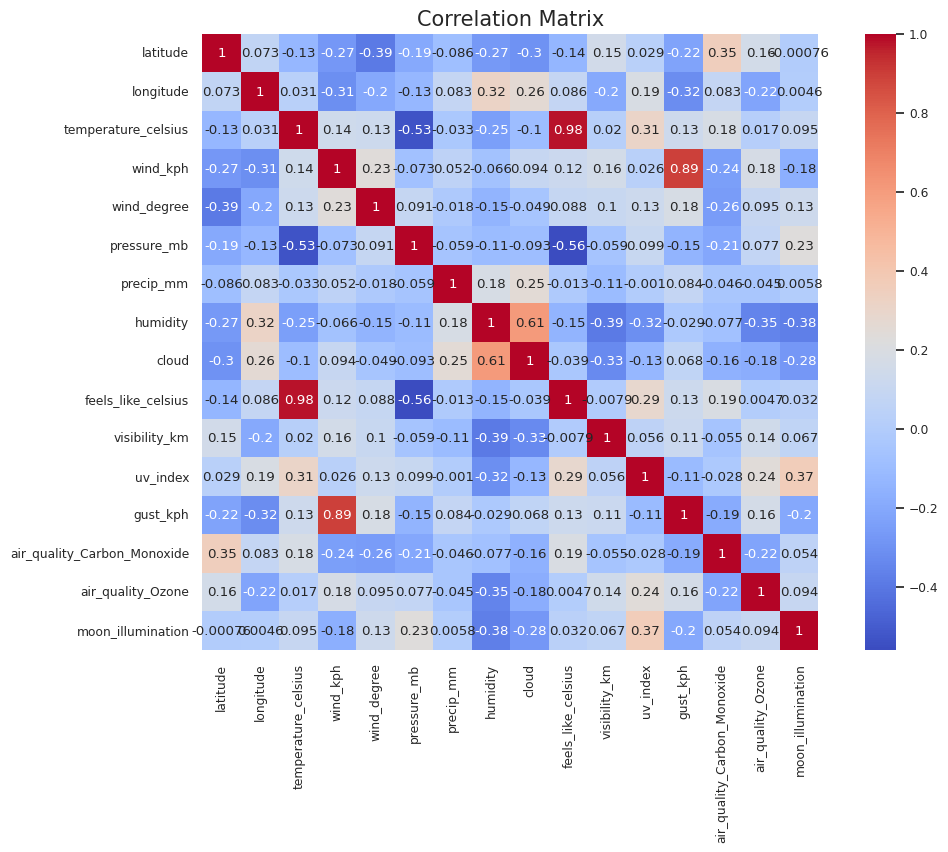

In [ ]:
correlations = df.corr()

plt.figure(figsize=(12, 8))
sns.set(font_scale=0.8)
sns.heatmap(correlations, cmap='coolwarm', square=True, annot=True)
plt.title('Correlation Matrix', fontsize=15)

plt.show()